In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as pt
from tensorflow.keras.datasets.mnist import load_data


In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

n_train = len(x_train)
n_test = len(x_test)

print(f"Length of test dataset: {n_test}")
print(f"Length of train dataset: {n_train}")

Length of test dataset: 10000
Length of train dataset: 60000


### Lets take a look at one of these images

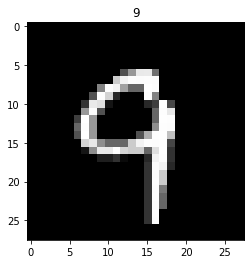

In [3]:
rand: int = int(np.random.randn()*n_test)
pt.imshow(x_train[rand].reshape(28, 28), cmap='gray')
pt.title(y_train[rand])
pt.show()

In [4]:
rand_perm = np.random.permutation(n_train)
x_train = x_train[rand_perm]
y_train = y_train[rand_perm]

y_train = tf.one_hot(y_train, depth=10, on_value=1, off_value=0)

x_train = x_train[..., np.newaxis]

X = x_train[:40000]
y = y_train[:40000]

x_val = x_train[40000:]
y_val = y_train[40000:]


### Ok, so most ( really all ) of the data processing is done so lets just get right into the learning!

### So up first lets go with a conventional Deep Convolutional Neural Network
- Note, we can't go too deep or we will reach the vanishing gradient problem
- We can also theoretically do data augmentation, but we will do that later and compare and contrast
- We will also start off guns blazing with the normalization and pooling

#### Architecture
    - Conv Input
    - Batch Normalization
    - Activation 
    - Max Pooling
---
    - Conv Input
    - Batch Normalization
    - Activation
    - Max Pooling
---
    - Conv Input
    - Batch Normalization
    - Activation
    - Max Pooling
---
    - Conv Input
    - Batch Normalization
    - Activation
<!--     - Max Pooling -->
---
    - Conv Input
    - Batch Normalization
    - Activation
    - Average Pooling
    - Flatten
---
    - Dense Layer
    - ReLU
---
    - Dropout 
    - Dense Layer
    - Softmax

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import activations as act

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(10, (5, 5), input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(10, (5, 5), padding='same')) # zero padding
model.add(layers.BatchNormalization())
model.add(layers.Activation(act.relu))
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(30))
model.add(layers.Activation(act.relu))

model.add(layers.Dropout(0.3))
model.add(layers.Dense(10))
model.add(layers.Activation(act.softmax))

In [6]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.0001),
                loss='categorical_crossentropy',
                 metrics=['accuracy']) 
# we have an extremely balanced dataset so classification accuracy is valid

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 10)        40        
_________________________________________________________________
activation (Activation)      (None, 24, 24, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 10)        2510      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 10)        0

In [8]:
history = model.fit(X, y, 
         batch_size=128,
         epochs=50,
         validation_data=(x_val, y_val))

Epoch 1/50
313/313 [==============================] - 4s 7ms/step - loss: 2.1992 - accuracy: 0.1436 - val_loss: 1.8513 - val_accuracy: 0.3668
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 1.7345 - accuracy: 0.3996 - val_loss: 1.3818 - val_accuracy: 0.6366
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 1.3671 - accuracy: 0.6098 - val_loss: 0.9974 - val_accuracy: 0.8389
Epoch 4/50
313/313 [==============================] - 2s 5ms/step - loss: 1.0192 - accuracy: 0.7676 - val_loss: 0.6584 - val_accuracy: 0.9250
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 0.7453 - accuracy: 0.8473 - val_loss: 0.4406 - val_accuracy: 0.9463
Epoch 6/50
313/313 [==============================] - 2s 5ms/step - loss: 0.5537 - accuracy: 0.8805 - val_loss: 0.2954 - val_accuracy: 0.9556
Epoch 7/50
313/313 [==============================] - 2s 5ms/step - loss: 0.4228 - accuracy: 0.9050 - val_loss: 0.2177 - val_accuracy: 0.9603
Epoch 

In [10]:
epochs = range(50)
train_acc = history.history['accuracy']
val_acc = history.history['val_acc']
pt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
pt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
pt.xlabel("Epochs")
pt.ylabel=("Accuracy")
pt.legend()
pt.show()

KeyError: 'val_acc'